In [1]:
import numpy as np
from colossus.cosmology import cosmology
from colossus.lss import mass_function
from colossus.halo import concentration
from colossus.halo import profile_nfw
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Generic properties from matplotlib
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True

In [2]:
# Set Cosmology at Planck18
cosmology.setCosmology('planck18')

In [3]:
# Redshift Range
z_data = np.array([0.0,0.5])

# Mass Definition
m_def_colossus = 'vir' # Virial, an overdensity that varies with redshift (Bryan & Norman 1998)

In [4]:
# Halo Mass Range
mass_range = np.logspace(6,15,10)

In [5]:
num_of_halos = []
for i in range(z_data.size):
    halos = []
    for j in range(mass_range.size):
        halos.append(mass_function.massFunction(mass_range[j], z_data[i], mdef = m_def_colossus, model = 'comparat17',
                                                q_out = 'dndlnM'))
    num_of_halos.append(halos)

In [6]:
conc_range = []
for i in range(z_data.size):
    conc = []
    for j in range(mass_range.size):
        conc.append(concentration.modelIshiyama21(mass_range[j], z_data[i], mdef = m_def_colossus)[0])
    conc_range.append(conc)

In [7]:
h = 0.7

rhos_data = []
rs_data = []
for i in range(z_data.size):
    rhos_1 = []
    rs_1 = []
    for j in range(mass_range.size):
        rhos, rs = profile_nfw.NFWProfile.nativeParameters(M=mass_range[j]*h, c=conc_range[i][j], z=z_data[i], mdef=m_def_colossus)
        rhos_1.append(rhos)
        rs_1.append(rs)
    rhos_data.append(rhos_1)
    rs_data.append(rs_1)

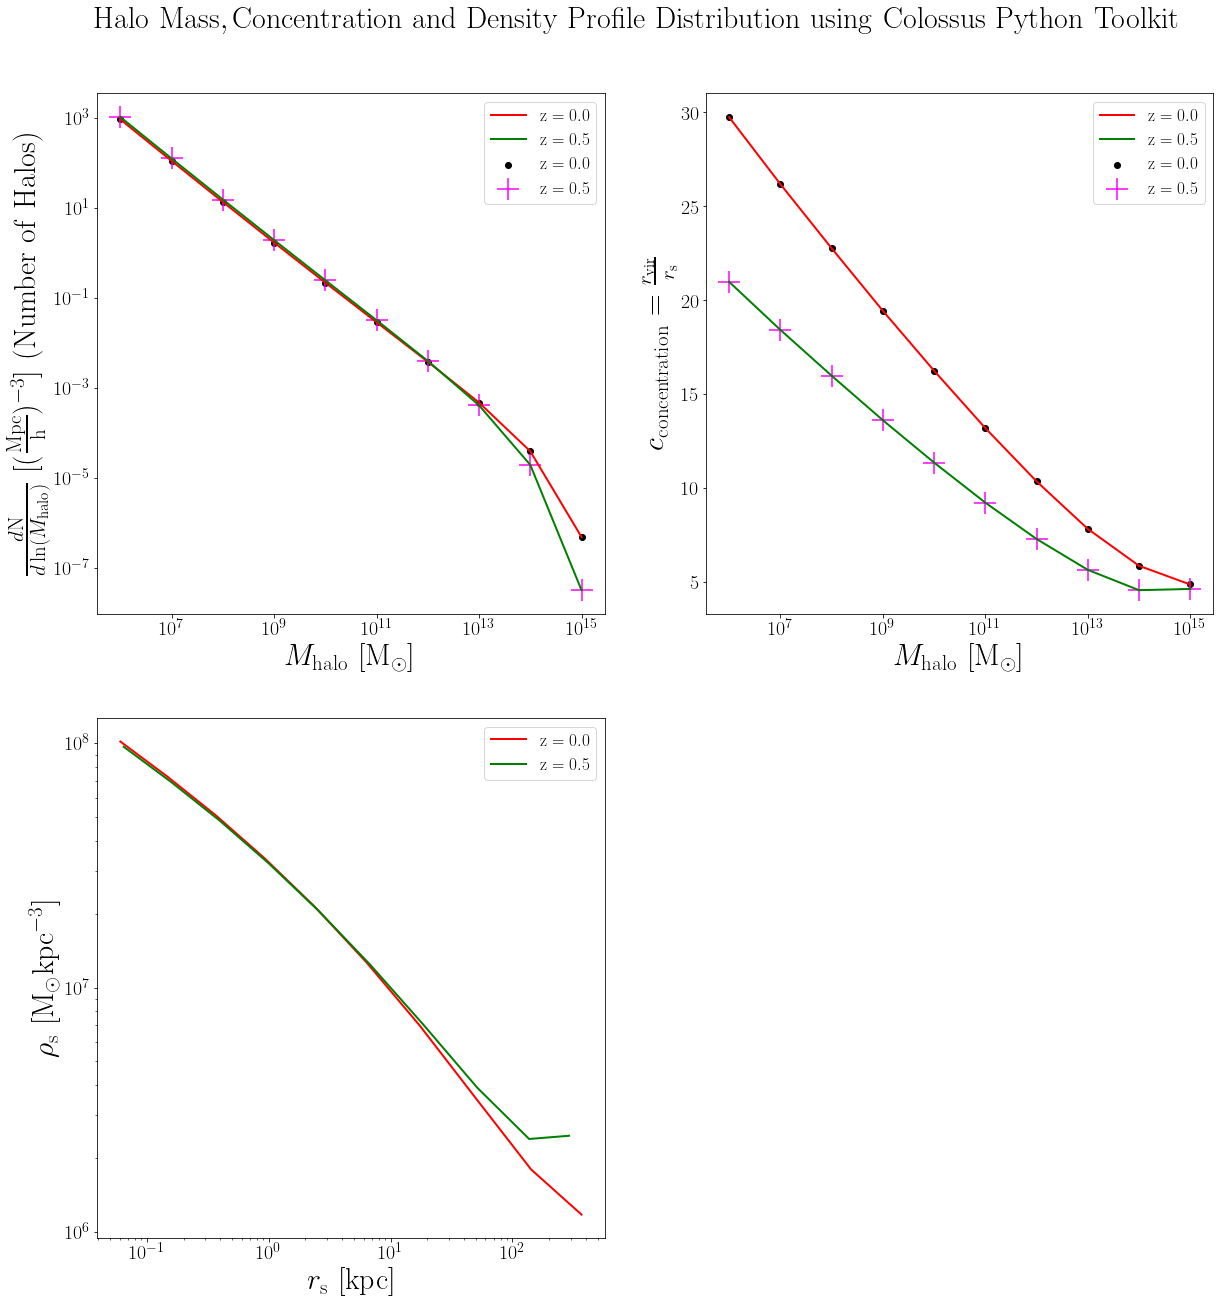

In [8]:
# Plots of dN/dln(M) vs M_halo with different parameter values redshift z, model = 'comparat17'
fig, ax = plt.subplots(2,2,figsize=(20,20))
fig.suptitle(r'${\rm Halo\,\,Mass, Concentration\,\,and\,\,Density\,\,Profile\,\,Distribution\,\,using\,\,Colossus\,\,Python\,\,Toolkit}$', fontsize=30)
fig.subplots_adjust(top=0.92)

ax1 = ax[0,0] 
ax1.set_xlabel(r'$M_{\rm halo}\,\,[\textup{M}_{\odot}]$', fontsize = 30)
ax1.set_ylabel(r'$\frac{d{\rm N}}{d\ln(M_{\rm halo})}\,\,[\rm (\frac{Mpc}{h})^{-3}]\,\,(Number\,\,of\,\,Halos)$', fontsize = 30)
ax1.plot(mass_range, num_of_halos[0], color = 'red', label = r'${\rm z} = 0.0$', linewidth = 2)
ax1.plot(mass_range, num_of_halos[1], color = 'green', label = r'${\rm z} = 0.5$', linewidth = 2)
ax1.scatter(mass_range, num_of_halos[0], color = 'black', label = r'${\rm z} = 0.0$')
ax1.scatter(mass_range, num_of_halos[1], color = 'magenta', label = r'${\rm z} = 0.5$', marker = '+', s = 500)
ticklabels1 = ax1.get_xticklabels()
ticklabels1.extend(ax1.get_yticklabels())
for label1 in ticklabels1:
    label1.set_color('k')
    label1.set_fontsize(20)
ax1.legend(fontsize=20)
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.title.set_text('Number of Halos')
ax1.legend(fontsize = 'xx-large')

# Plots of c_concentration vs M_halo with different parameter values redshift z, model = 'Ishiyama21'
ax2 = ax[0,1]
ax2.set_xlabel(r'$M_{\rm halo}\,\,[\textup{M}_{\odot}]$', fontsize = 30)
ax2.set_ylabel(r'$c_{\rm concentration}=\frac{r_{\rm vir}}{r_{\rm s}}$', fontsize = 30)
ax2.plot(mass_range, conc_range[0], color = 'red', label = r'${\rm z} = 0.0$', linewidth = 2)
ax2.plot(mass_range, conc_range[1], color = 'green', label = r'${\rm z} = 0.5$', linewidth = 2)
ax2.scatter(mass_range, conc_range[0], color = 'black', label = r'${\rm z} = 0.0$')
ax2.scatter(mass_range, conc_range[1], color = 'magenta', label = r'${\rm z} = 0.5$', marker='+', s = 500)
ticklabels2 = ax2.get_xticklabels()
ticklabels2.extend(ax2.get_yticklabels())
for label2 in ticklabels2:
    label2.set_color('k')
    label2.set_fontsize(20)
ax2.legend(fontsize=20)
ax2.set_xscale('log')
ax2.legend(fontsize = 'xx-large')


#Plots of rho_s vs r_s with different parameter values redshift z, model = 'profile_nfw'
ax3 = ax[1,0]
ax3.set_xlabel(r'$r_{\rm s}\,\,[\rm kpc]$', fontsize = 30)
ax3.set_ylabel(r'$\rho_{\rm s}\,\,[\rm M_{\odot}kpc^{-3}]$', fontsize = 30)
ax3.plot(rs_data[0],rhos_data[0], color = 'red', label = r'${\rm z} = 0.0$', linewidth = 2)
ax3.plot(rs_data[1],rhos_data[1], color = 'green', label = r'${\rm z} = 0.5$', linewidth = 2)
ticklabels3 = ax3.get_xticklabels()
ticklabels3.extend(ax3.get_yticklabels())
for label3 in ticklabels3:
    label3.set_color('k')
    label3.set_fontsize(20)
ax3.legend(fontsize=20)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend(fontsize = 'xx-large')
fig.delaxes(ax[1,1])
#fig.update_annotations(font_size=12)
fig.savefig('Session17_HackProject_Soumyodipta.pdf',bbox_inches='tight')